In [2]:
# Dependencies and Setup

"""The colors of these plots are the same for each drug throughout this data presentation. I felt that this
would make any comparison between graphs to be more straight forward. The marker types for the line 
are the same for each drug to also make looking at individual drugs within multiple plots easier.
Additionally, the drug names are purposely left in aphabetical order for faster referencing. I did 
not format the numbers in the dataframes because the dataframe results were secondary to the project.

I made each of the graphs the same size for easier comparison. The graph size 15 by 10 fits easily 
on my screen because the higher DPI (pixels per inch) of the screen."""

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.axis 
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import figure
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# I set these options to examine the complete data sets
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
# File to Load 

mouse_drug_data_path=os.path.join('data', 'mouse_drug_data.csv')
clinical_trial_data_path =os.path.join('data', 'clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df=pd.read_csv(mouse_drug_data_path)
print(mouse_drug_df.head())

clinical_trial_df=pd.read_csv(clinical_trial_data_path)
print(clinical_trial_df)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_drug_df, clinical_trial_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']], 
                  on='Mouse ID', how='outer')
# Display the data table for preview
merged_df.head()


  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_volume_by_drug_and_time=merged_df.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':['mean']})

# I sorted the unique values of the drug alphabetically ascending (by default)
drug_series=merged_df['Drug'].sort_values().unique()
print(drug_series)

mean_tumor_volume_by_drug_and_time.columns=['average_tumor_vol']
mean_tumor_volume_by_drug_and_time.reset_index(inplace=True)


# This ensures that I can see the drug name in each row
with pd.option_context('display.multi_sparse', False):
    print(mean_tumor_volume_by_drug_and_time.head(20))

# Convert to DataFrame

# Preview DataFrame


['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']
         Drug  Timepoint  average_tumor_vol
0   Capomulin          0          45.000000
1   Capomulin          5          44.266086
2   Capomulin         10          43.084291
3   Capomulin         15          42.064317
4   Capomulin         20          40.716325
5   Capomulin         25          39.939528
6   Capomulin         30          38.769339
7   Capomulin         35          37.816839
8   Capomulin         40          36.958001
9   Capomulin         45          36.236114
10   Ceftamin          0          45.000000
11   Ceftamin          5          46.503051
12   Ceftamin         10          48.285125
13   Ceftamin         15          50.094055
14   Ceftamin         20          52.157049
15   Ceftamin         25          54.287674
16   Ceftamin         30          56.769517
17   Ceftamin         35          58.827548
18   Ceftamin         40          61.467895
19   

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

st_error_tumor_vol_df=merged_df.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':['sem']})


# Rename column
st_error_tumor_vol_df.columns=['st_error_tumor_vol']
st_error_tumor_vol_df.reset_index(inplace=True)

# I wanted to make sure that I saw the data with the drug name next to each row
with pd.option_context('display.multi_sparse', False):
    print(st_error_tumor_vol_df.head())

        Drug  Timepoint  st_error_tumor_vol
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731


In [5]:


st_error_tumor_vol_df_pivot=st_error_tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='st_error_tumor_vol')
st_error_tumor_vol_df_pivot



# Print DataFrame



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
# Prints entire dataframe
mean_tumor_volume_by_drug_and_time


,Drug,Timepoint,average_tumor_vol
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Minor Data Munging to Re-Format the Data Frames
# This pivot makes the data more useable in the required plots.

mean_tumor_vol_df2=mean_tumor_volume_by_drug_and_time.pivot(index='Timepoint', columns='Drug', values='average_tumor_vol')
mean_tumor_vol_df2

# Print entire dataframe
    



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


<Figure size 1080x720 with 0 Axes>

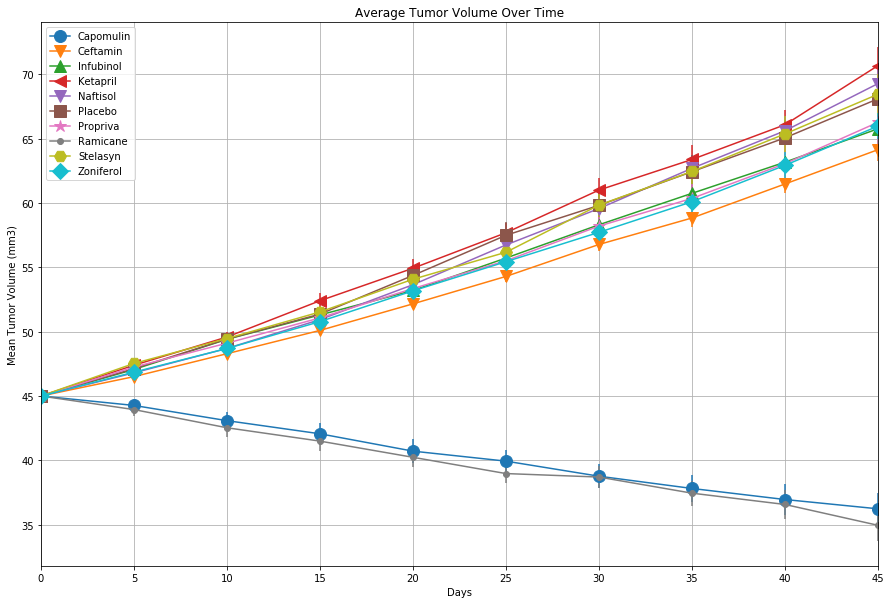

In [8]:
# Generate the Plot (with Error Bars)
plt.figure(num=1, figsize=(15,10))



this_plot=mean_tumor_vol_df2.plot(kind = 'line', markersize = 12, yerr = st_error_tumor_vol_df_pivot)
# Ensures that the line colors match
this_plot.set_prop_cycle(None)



plt.xlabel('Days')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Average Tumor Volume Over Time')
plt.gcf().set_size_inches(15, 10)
plt.grid()

markers_list=['o', 'v', '^', '<', 'v', 's', '*', '.', 'H', 'D', 'X', 'p']

for i, line in enumerate(this_plot.get_lines()):
    line.set_marker(markers_list[i])

this_plot.legend(this_plot.get_lines(), mean_tumor_vol_df2.columns, loc='best')

plt.savefig('average_tumor_volume_over_time.png')


In [9]:
# Save the figure



# Show the Figure

plt.show()



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_mt_site_df=merged_df.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites':['mean']})


mean_mt_site_df.columns = ['mean_mt_site']
mean_mt_site_df.reset_index(inplace=True)

# This is the full dataframe in long form before the pivot
print(mean_mt_site_df)






         Drug  Timepoint  mean_mt_site
0   Capomulin          0      0.000000
1   Capomulin          5      0.160000
2   Capomulin         10      0.320000
3   Capomulin         15      0.375000
4   Capomulin         20      0.652174
5   Capomulin         25      0.818182
6   Capomulin         30      1.090909
7   Capomulin         35      1.181818
8   Capomulin         40      1.380952
9   Capomulin         45      1.476190
10   Ceftamin          0      0.000000
11   Ceftamin          5      0.380952
12   Ceftamin         10      0.600000
13   Ceftamin         15      0.789474
14   Ceftamin         20      1.111111
15   Ceftamin         25      1.500000
16   Ceftamin         30      1.937500
17   Ceftamin         35      2.071429
18   Ceftamin         40      2.357143
19   Ceftamin         45      2.692308
20  Infubinol          0      0.000000
21  Infubinol          5      0.280000
22  Infubinol         10      0.666667
23  Infubinol         15      0.904762
24  Infubinol         20 

In [11]:
#Again, this pivot makes the dataframe more easily useable for the plot
mean_mt_site_df_pivot = mean_mt_site_df.pivot(index = 'Timepoint', columns='Drug', values = 'mean_mt_site')
mean_mt_site_df_pivot

# Preview DataFrame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_site_st_error_df = merged_df.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites':['sem']})


met_site_st_error_df.columns = ['met_site_ste']
met_site_st_error_df.reset_index(inplace=True)
print(met_site_st_error_df)

met_site_st_error_df_pivot = met_site_st_error_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'met_site_ste')
met_site_st_error_df_pivot

# Convert to DataFrame

# Preview DataFrame


         Drug  Timepoint  met_site_ste
0   Capomulin          0      0.000000
1   Capomulin          5      0.074833
2   Capomulin         10      0.125433
3   Capomulin         15      0.132048
4   Capomulin         20      0.161621
5   Capomulin         25      0.181818
6   Capomulin         30      0.172944
7   Capomulin         35      0.169496
8   Capomulin         40      0.175610
9   Capomulin         45      0.202591
10   Ceftamin          0      0.000000
11   Ceftamin          5      0.108588
12   Ceftamin         10      0.152177
13   Ceftamin         15      0.180625
14   Ceftamin         20      0.241034
15   Ceftamin         25      0.258831
16   Ceftamin         30      0.249479
17   Ceftamin         35      0.266526
18   Ceftamin         40      0.289128
19   Ceftamin         45      0.286101
20  Infubinol          0      0.000000
21  Infubinol          5      0.091652
22  Infubinol         10      0.159364
23  Infubinol         15      0.194015
24  Infubinol         20 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [13]:
# Minor Data Munging to Re-Format the Data Frames



# Preview that Reformatting worked


<Figure size 1152x864 with 0 Axes>

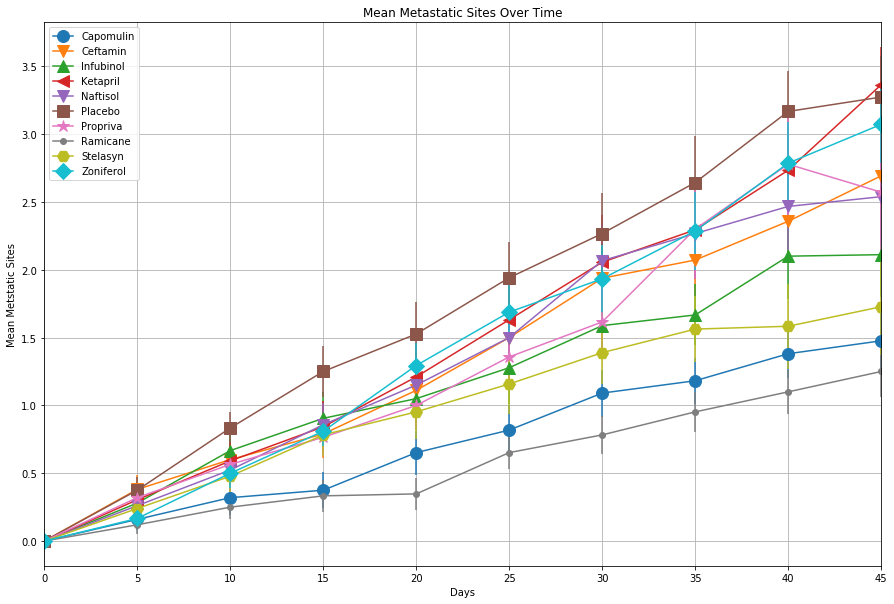

In [14]:

# Generate the Plot (with Error Bars)


# Generate the Plot (with Error Bars)
plt.figure(num = 1, figsize = (16,12))



this_plot2=mean_mt_site_df_pivot.plot(kind = 'line', markersize = 12, yerr = met_site_st_error_df_pivot)
#Ensures that the line colors match
this_plot2.set_prop_cycle(None)
plt.xlabel('Days')
plt.ylabel('Mean Metstatic Sites')
plt.title('Mean Metastatic Sites Over Time')
plt.gcf().set_size_inches(15, 10)

markers_list = ['o', 'v', '^', '<', 'v', 's', '*', '.', 'H', 'D', 'X', 'p']

#Cycles through the markers for each of the drugs in the plot 
# then it uses these same markers in the legend.
for i, line in enumerate(this_plot2.get_lines()):
    line.set_marker(markers_list[i])

this_plot2.legend(this_plot2.get_lines(), mean_mt_site_df_pivot.columns, loc = 'best')

plt.grid()
# Save the figure
plt.savefig('mean_metistatic_sites.png')
# Show the figure
plt.show()








![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
mice_count_df = merged_df.groupby(['Drug', 'Timepoint']).agg({'Mouse ID':['count']})
mice_count_df.columns=['mouse_count']
mice_count_df.reset_index(inplace=True)



# Calculating maximum number of mice that each trial used 
# This assumes that the maximum number is the initial number and 
# that the mice did not reproduce within the 45 days.
max_mice_count = mice_count_df.groupby('Drug')['mouse_count'].max()
# Calculating and assigning the new 'Survival Rate' column for each treatment/drug
mice_count_df = mice_count_df.assign(survival_rate = [(mouse_count/max_mice_count[drug])*100 \
            for drug, mouse_count in mice_count_df[['Drug', 'mouse_count']].values]) \
            .rename(columns = {'survival_rate':'Survival Rate'})

#show dataframe
mice_count_df


,Drug,Timepoint,mouse_count,Survival Rate
0,Capomulin,0,25,100.000000
1,Capomulin,5,25,100.000000
2,Capomulin,10,25,100.000000
3,Capomulin,15,24,96.000000
4,Capomulin,20,23,92.000000
5,Capomulin,25,22,88.000000
6,Capomulin,30,22,88.000000
7,Capomulin,35,22,88.000000
8,Capomulin,40,21,84.000000
9,Capomulin,45,21,84.000000


In [16]:
mice_count_pivot = mice_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Survival Rate')
mice_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


<Figure size 1080x720 with 0 Axes>

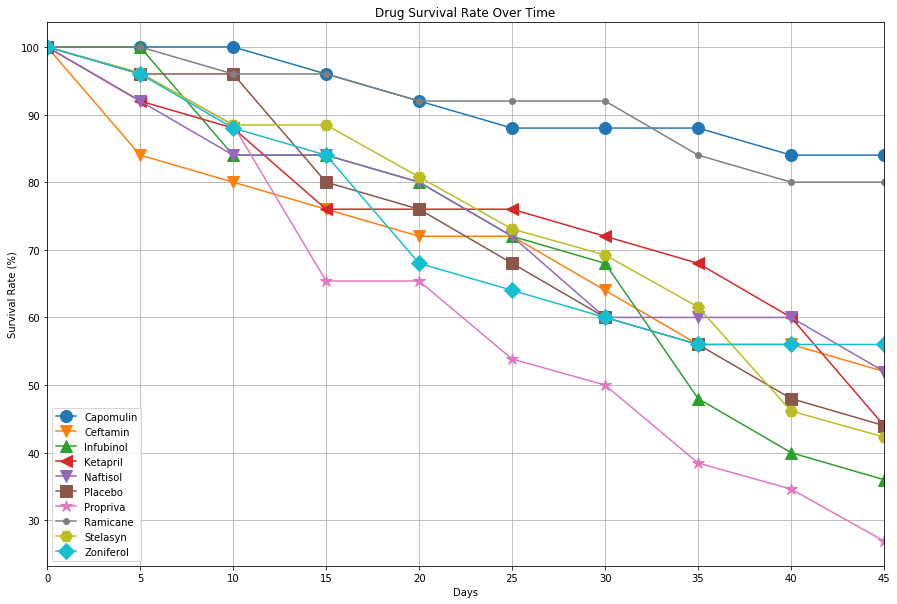

In [17]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
# Generate the Plot (with Error Bars)


plt.figure(num = 1, figsize = (15, 10))



this_plot3=mice_count_pivot.plot(kind = 'line', markersize = 12)
#Ensures that the line colors match
this_plot3.set_prop_cycle(None)


plt.xlabel('Days')
plt.ylabel('Survival Rate (%)')
plt.title('Drug Survival Rate Over Time')
plt.gcf().set_size_inches(15, 10)

markers_list=['o', 'v', '^', '<', 'v', 's', '*', '.', 'H', 'D', 'X', 'p']

for i, line in enumerate(this_plot3.get_lines()):
    line.set_marker(markers_list[i])

this_plot3.legend(this_plot3.get_lines(), mean_mt_site_df_pivot.columns, loc = 'best')
plt.grid();

plt.savefig('drug_survival_rate.png')
plt.show()

In [18]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug



# Display the data to confirm


In [20]:

#I calculated the the percent change in a single line (2 lines with continuation character)  of code, 
#so I felt a function was overkill since it only needed to be called once.
    
percent_change_df=mean_tumor_volume_by_drug_and_time.groupby('Drug',sort = False).apply(lambda x: (x['average_tumor_vol'].values[-1] - x['average_tumor_vol'].values[0]) / x['average_tumor_vol'].values[-1] * 100)\
    .reset_index(name='pct_change')

# Creates an index with a value of zero to easily make a pivot table with one row

percent_change_df['new_index']=0

percent_change_pivot=percent_change_df.pivot(index='new_index', columns='Drug', values='pct_change')



![Metastatic Spread During Treatment](../Images/change.png)

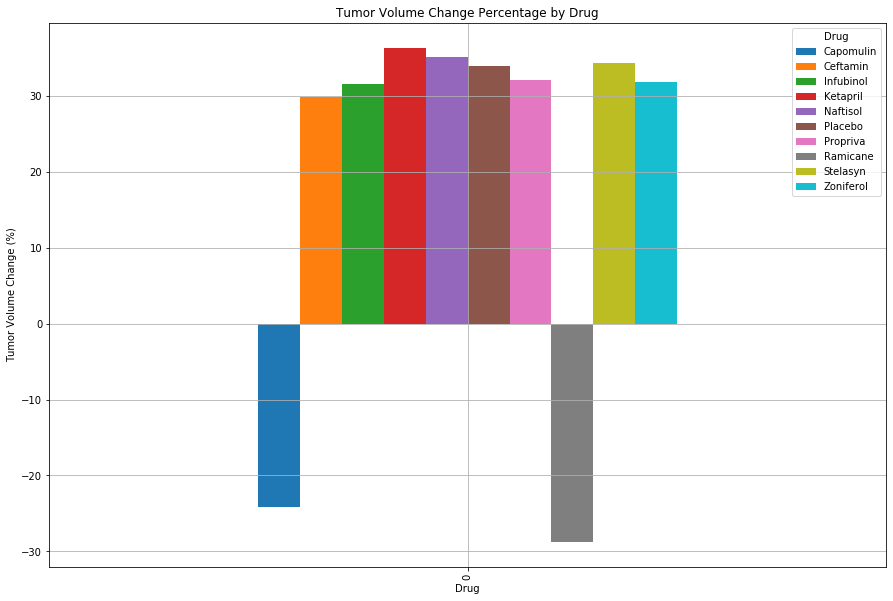

In [22]:

this_plot4=percent_change_pivot.plot(kind = 'bar')
# Despite this setting it still cycles through the colors by default.
# I maintained the colors to distinguish among the drugs and remain
# consistent with other plots.
# I used the 

this_plot4.set_prop_cycle(None)


plt.xlabel('Drug')
plt.ylabel('Tumor Volume Change (%)')
plt.title('Tumor Volume Change Percentage by Drug')
plt.gcf().set_size_inches(15, 10)
plt.grid()
plt.savefig('tumor_volume_change_bar.png')
plt.show()